# Bayesian Networks Python
we’ll be using Bayesian Networks to solve the famous Monty Hall Problem.

## The Monty Hall problem
 The game involves three doors, given that behind one of these doors is a car and the remaining two have goats behind them. So you start by picking a random door, say #2. On the other hand, the host (Monty) knows where the car is hidden and he opens another door, say #1 (behind which there is a goat). Here’s the catch, you’re now given a choice, the host will ask you if you want to pick door #3 instead of your first choice i.e. #2.
#### Is it better if you switch your choice or should you stick to your first choice?
This is exactly what we’re going to model. We’ll be creating a Bayesian Network to understand the probability of winning if the participant decides to switch his choice.

### The first step
is to build a Directed Acyclic Graph (DAG).
The graph has three nodes, each representing the door chosen by:
1.The door selected by the Guest
2.The door containing the prize (car)
3.The door Monty chooses to open

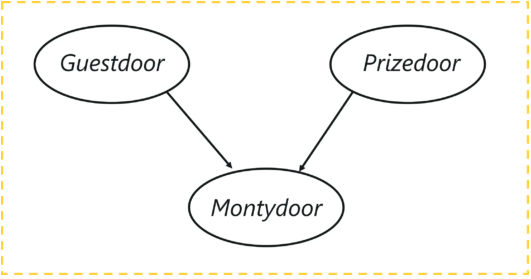

In [1]:
from IPython import display
display.Image("./bn.png")

Let’s understand the dependencies here, the door selected by the guest and the door containing the car is completely random outcomes. However, the door Monty chooses to open is dependent on both the doors; the door selected by the guest, and the door the prize is behind. Monty has to choose in such a way that the door does not contain the prize and it cannot be the one chosen by the guest.

First we import required packages
pomegranate is a Python package that implements fast and flexible probabilistic models ranging from individual probability distributions to compositional models such as Bayesian networks and hidden Markov models.

In [2]:
#pip install pomegranate

In [3]:
import math
from pomegranate import *

The door the guest initially chooses and the door the prize is behind are uniform random outcomes across the three doors, but the door which Monty opens is dependent on both the door the guest chooses (it cannot be the door the guest chooses), and the door the prize is behind (it cannot be the door with the prize behind it). So we draw out the conditional probability considering all possible scenarios.

Let’s understand this problem now with the concepts of Probability. A typical random experiment involves several randomly-determined quantities which are:

1. The door concealing the car.
2. Door that is initially chosen by the guest.
3. The door that Monty opens to reveal a goat.

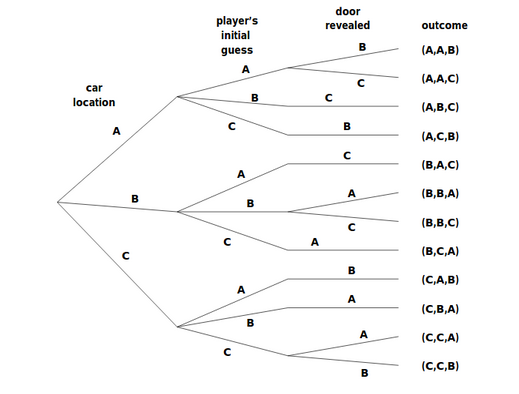

In [4]:
display.Image("./cpt1.png")

As you can see above, this Tree Diagram represents all possibilities of this Puzzle. Car location, Player’s guess, and doors revealed making the outcome. All possible values of the outcome make the sample space and the probability of other events -which are impossible-  is 0 because it can not occur in any situation. Let’s understand what each of these outcomes represents. For example, BAC here represents that car is located behind B, your initial guess is A and Monty revealed the door C.

Out of this sample space, how will you define the events? For example, the event that the prize is behind door C is the set of outcomes:

{(C,A,B),(C,B,A),(C,C,A),(C,C,B)}

Because the first letter represents the Car Location in our Tree Diagram.

The event that you initially picked the door concealing the prize is the set of outcomes:

{(A,A,B),(A,A,C),(B,B,A),(B,B,C),(C,C,A),(C,C,B)

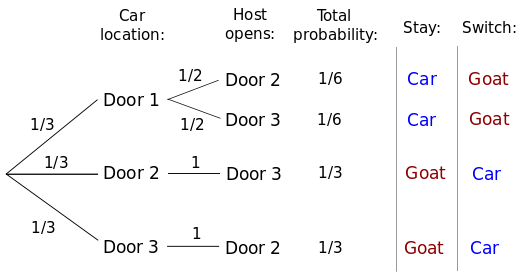

In [5]:
display.Image("./mhp.png")

In the code ‘A’, ‘B’, ‘C’, represent the doors picked by the guest, prize door and the door picked by Monty respectively. Here we’ve drawn out the conditional probability for each of the nodes.

In [6]:
# Initially the door selected by the guest is completely random
guest =DiscreteDistribution( { 'A': 1./3, 'B': 1./3, 'C': 1./3 } )
 
# The door containing the prize is also a random outcome
prize =DiscreteDistribution( { 'A': 1./3, 'B': 1./3, 'C': 1./3 } )
 
# The door Monty picks, depends on the choice of the guest and the prize door
#so here we have the conditional probability of Monty's choice given prize door nd the guest's choice
monty =ConditionalProbabilityTable(
[[ 'A', 'A', 'A', 0.0 ],
[ 'A', 'A', 'B', 0.5 ],
[ 'A', 'A', 'C', 0.5 ],
[ 'A', 'B', 'A', 0.0 ],
[ 'A', 'B', 'B', 0.0 ],
[ 'A', 'B', 'C', 1.0 ],
[ 'A', 'C', 'A', 0.0 ],
[ 'A', 'C', 'B', 1.0 ],
[ 'A', 'C', 'C', 0.0 ],
[ 'B', 'A', 'A', 0.0 ],
[ 'B', 'A', 'B', 0.0 ],
[ 'B', 'A', 'C', 1.0 ],
[ 'B', 'B', 'A', 0.5 ],
[ 'B', 'B', 'B', 0.0 ],
[ 'B', 'B', 'C', 0.5 ],
[ 'B', 'C', 'A', 1.0 ],
[ 'B', 'C', 'B', 0.0 ],
[ 'B', 'C', 'C', 0.0 ],
[ 'C', 'A', 'A', 0.0 ],
[ 'C', 'A', 'B', 1.0 ],
[ 'C', 'A', 'C', 0.0 ],
[ 'C', 'B', 'A', 1.0 ],
[ 'C', 'B', 'B', 0.0 ],
[ 'C', 'B', 'C', 0.0 ],
[ 'C', 'C', 'A', 0.5 ],
[ 'C', 'C', 'B', 0.5 ],
[ 'C', 'C', 'C', 0.0 ]], [guest, prize] )

s1 = Node(guest, name="guest")
s2 = Node(prize, name="prize")
s3 = Node(monty, name="monty")

Now we build the Bayesian Network

In [7]:
model = BayesianNetwork("Monty Hall Problem")
model.add_states(s1, s2, s3)
model.add_edge(s1, s3)
model.add_edge(s2, s3)
model.bake()

#### Attention
The objects ‘state’ and ‘node’ are really the same thing and can be used interchangeable. The only difference is the name, as hidden Markov models use ‘state’ in the literature frequently whereas Bayesian networks use ‘node’ frequently.

### The next step 
is to make predictions using this model. One of the strengths of Bayesian networks is their ability to infer the values of arbitrary ‘hidden variables’ given the values from ‘observed variables.’ These hidden and observed variables do not need to be specified beforehand, and the more variables which are observed the better the inference will be on the hidden variables.

Note that the exact version of this algorithm takes exponential time with the number of variables and typically can’t be done on more than ~25 variables. This is because there are a super-exponential number of directed acyclic graphs that one could define over a set of variables. 

Now that we’ve built the model, it’s time to make predictions.

In [8]:
beliefs = model.predict_proba({ 'guest' : 'A' })
#we assume that the guest picked A
beliefs = map(str, beliefs)
print("n".join( "{}t{}".format( state.name, belief ) for state, belief in zip( model.states, beliefs ) ))


guesttAnprizet{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "A" : 0.3333333333333333,
            "B" : 0.3333333333333333,
            "C" : 0.3333333333333333
        }
    ],
    "frozen" : false
}nmontyt{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "A" : 0.0,
            "C" : 0.49999999999999983,
            "B" : 0.49999999999999983
        }
    ],
    "frozen" : false
}


In the above code snippet, we’ve assumed that the guest picks door ‘A’. Given this information, the probability of the prize door being ‘A’, ‘B’, ‘C’ is equal (1/3) since it is a random outcome. However, the probability of Monty picking ‘A’ is obviously zero since the guest picked the door ‘A’. And the other two doors have a 50% chance of being picked by Monty since we don’t know which is the prize door.

In [9]:
beliefs = model.predict_proba({'guest' : 'A', 'monty' : 'B'})
print("n".join( "{}t{}".format( state.name, str(belief) ) for state, belief in zip( model.states, beliefs )))
 

guesttAnprizet{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "A" : 0.3333333333333334,
            "B" : 0.0,
            "C" : 0.6666666666666664
        }
    ],
    "frozen" : false
}nmontytB


In the above code, we’ve provided two inputs to our Bayesian Network, this is where things get interesting. We’ve mentioned the following:
1.The guest picks door ‘A’
2.Monty picks door ‘B’
Notice the output, the probability of the car being behind door ‘C’ is approx. 66%. This proves that if the guest switches his choice, he has a higher probability of winning. Though this might seem confusing to some of you, it’s a known fact that:
Guests who decided to switch doors won about 2/3 of the time
Guests who refused to switch won about 1/3 of the time
Bayesian Networks are used in such cases that involve predicting uncertain tasks and outcomes.